In [60]:
# finding optimal block length for CBB via non parametric plugin method
import numpy as np
import random
import pandas as pd
from math import sqrt



data_csv=pd.read_csv("C:\\Users\\shankhajyoti\\Dropbox\\Deepak\\GOOGL_data.csv")
data_to_use= len(data_csv)
 
# number of training data
# should be less than data_to_use
train_end =len(data_csv)-458
 
 
total_data=len(data_csv)
 
#most recent data is in the end 
#so need offset
start=total_data - data_to_use
 
 
#currently doing prediction only for 1 step ahead
steps_to_predict =1
 
  
yt = data_csv.iloc [start:total_data ,4]    #Close price
yt1 = data_csv.iloc [start:total_data ,1]   #Open
yt2 = data_csv.iloc [start:total_data ,2]   #High
yt3 = data_csv.iloc [start:total_data ,3]   #Low
vt = data_csv.iloc [start:total_data ,5]    # volume
 
 
print ("yt head :")
print (yt.head())
 
yt_ = yt.shift (-1)
    
data = pd.concat ([yt, yt_, vt, yt1, yt2, yt3], axis =1)
data. columns = ['yt', 'yt_', 'vt', 'yt1', 'yt2', 'yt3']
     
data = data.dropna()
cols =['yt']
x = data [cols]
x_train=x.loc[0:799,:] 
# we apply the bootstrap only on the training data
x_train=np.array(x_train).reshape(len(x_train),1)

ind=np.zeros((800,1),dtype=np.int)
for i in range(0,800):
    ind[i,0]=i
ind=np.array(ind).reshape(len(ind),1)    
m=5
n=800  #training_data_size
l1=2
b1=80
sum=0
mu=np.mean(x_train,axis=0)
print("d")
def si(block_length,arr):
    l=block_length
    array=arr.reshape(len(arr))
    b=(n//l)+1
    sum=0.0
    for i in range(b):
        
        j=np.random.choice(array,replace=True)
        for k in range(j,j+l):
            sum=sum+x_train[k%n,0]
    return (sqrt(n)*((sum)/(b*l)-mu))
print("d")
sihat=si(l1,ind)
print("d")
sum2=0.0

for i in range(n):
    A=ind
    
    if(i+m-1<n):
        A=np.delete(A,np.s_[i:i+m],axis=0)
    else:
        A=np.delete(A,np.s_[i:n],axis=0)
        A=np.delete(A,np.s_[0:m-n+i+1],axis=0)
    sihat_i=si(l1,A)
    sum2=sum2+(((n-m)*(sihat-sihat_i))/m)**2
var_jab=(m/(n-m))*(1/n)*sum2
bias=2*(si(l1,ind)-si(2*l1,ind))
c2=l1*sqrt(n)*bias
c1=(n**2)*(1/(l1**2))*var_jab
opti_blocklength=((c2*c2/c1)**0.25)*((n)**0.25)
print (opti_blocklength)


yt head :
0    393.0777
1    391.6012
2    390.7403
3    391.8214
4    394.3039
Name: close, dtype: float64
d
d
d
[0.82777465]


In [43]:
# calculates MSE(si_estimate) for given blocklength in cbb
import numpy as np
from math import sqrt
n=800
sum3=0.0
l1=100

b1=(n//l1)
if(n!=b1*l1):
    b1=b1+1

n_bootstrap=1000

def si(block_length,arr):
    l=block_length
    array=arr.reshape(len(arr))
    b=b1
    sum=0.0
    for i in range(b):
        
        j=np.random.choice(array,replace=True)
        for k in range(j,j+l):
            sum=sum+x_train[k%n,0]
    return (sqrt(n)*((sum)/(b*l)-mu)) 
for p in range(n_bootstrap):
    sum3=sum3+(si(l1,ind))**2
return(sqrt(sum3/1000))  
# conclusion through non parametric plugin methods and then changing values of block length around the opti_blocklength
#we observe that 2/3 is the best blocklength giving the least var

818.0966900524623

In [34]:
# same process applied to Moving block bootstrap
import numpy as np
import random
import pandas as pd
from math import sqrt



data_csv=pd.read_csv("C:\\Users\\shankhajyoti\\Dropbox\\Deepak\\GOOGL_data.csv")
data_to_use= len(data_csv)
 
# number of training data
# should be less than data_to_use
train_end =len(data_csv)-458
 
 
total_data=len(data_csv)
 
#most recent data is in the end 
#so need offset
start=total_data - data_to_use
 
 
#currently doing prediction only for 1 step ahead
steps_to_predict =1
 
  
yt = data_csv.iloc [start:total_data ,4]    #Close price
yt1 = data_csv.iloc [start:total_data ,1]   #Open
yt2 = data_csv.iloc [start:total_data ,2]   #High
yt3 = data_csv.iloc [start:total_data ,3]   #Low
vt = data_csv.iloc [start:total_data ,5]    # volume
 
 
print ("yt head :")
print (yt.head())
 
yt_ = yt.shift (-1)
    
data = pd.concat ([yt, yt_, vt, yt1, yt2, yt3], axis =1)
data. columns = ['yt', 'yt_', 'vt', 'yt1', 'yt2', 'yt3']
     
data = data.dropna()
cols =['yt']
x = data [cols]
x_train=x.loc[0:799,:] 
# we apply the bootstrap only on the training data
x_train=np.array(x_train).reshape(len(x_train),1)


m=5
n=800  #training_data_size
l1=10
b1=n//l1
if(n!=b1*l1):
    b1=b1+1
sum=0
N=n-l1+1
ind=np.zeros((N,1),dtype=np.int)
for i in range(0,N):
    ind[i,0]=i
ind=np.array(ind).reshape(len(ind),1)    
mu=np.mean(x_train,axis=0)
print("d")
def si(block_length,arr):
    l=block_length
    array=arr.reshape(len(arr))
    b=n//l
    if(n!=b*l):
        b=b+1
    
    sum=0.0
    for i in range(b):
        
        j=np.random.choice(array,replace=True)
        for k in range(j,j+l):
            sum=sum+x_train[k,0]
    return (sqrt(n)*((sum)/(b*l)-mu))
print("d")
sihat=si(l1,ind)
print("d")
sum2=0.0
M=N-m+1
for i in range(N-m+1):
    A=ind
    
    
    A=np.delete(A,np.s_[i:i+m],axis=0)
    
    sihat_i=si(l1,A)
    sum2=sum2+(((N-m)*(sihat-sihat_i))/m)**2
var_jab=(m/(N-m))*(1/M)*sum2

ind2=np.zeros((n-2*l1+1,1),dtype=np.int)
for i in range(0,n-2*l1+1):
    ind2[i,0]=i
ind2=np.array(ind2).reshape(len(ind2),1)   



bias=2*(si(l1,ind)-si(2*l1,ind2))
c2=l1*sqrt(n)*bias
c1=(n**2)*(1/(l1**2))*var_jab
opti_blocklength=((c2*c2/c1)**0.25)*((n)**0.25)
print (opti_blocklength)


yt head :
0    393.0777
1    391.6012
2    390.7403
3    391.8214
4    394.3039
Name: close, dtype: float64
d
d
d
[2.91380785]


In [47]:
# calculates MSE(si_estimate) for given blocklength in mbb
import numpy as np
from math import sqrt
sum3=0.0
l1=2
b1=n//l1
if(n!=b1*l1):
    b1=b1+1
n_bootstrap=1000

def si(block_length,arr):
    l=block_length
    array=arr.reshape(len(arr))
    
    sum=0.0
    for i in range(b1):
        
        j=np.random.choice(array,replace=True)
        for k in range(j,j+l):
            sum=sum+x_train[k,0]
    return (sqrt(n)*((sum)/(b1*l)-mu)) 
for p in range(n_bootstrap):
    N=n-l1+1
    ind=np.zeros((N,1),dtype=np.int)
    for i in range(0,N):
        ind[i,0]=i
    ind=np.array(ind).reshape(len(ind),1)   
    sum3=sum3+(si(l1,ind))**2
return(sqrt(sum3/1000))  
# conclusion through non parametric plugin methods and then changing values of block length around the opti_blocklength
#we observe that 2/3 is the best blocklength giving the least var

139.13032123281462

In [46]:
# checking optimal block length by checking var of si_estimate for non overlapping bootstrap
import numpy as np
from math import sqrt
l1=2  #blocklength
n_bootstrap=1000
n=800
N=n//l1
if(n!=N*l1):
    N=N+1
array=np.zeros((N,1),dtype=np.int)

for i in range(N):
    array[i,0]=i
arr=array.reshape(len(array))
mu=np.mean(x_train,axis=0)
mse=0.0
for k in range(n_bootstrap):
    n_elements=0
    sum=0.0
    while(n_elements<n):
        j=np.random.choice(arr,replace=True)
        if(j!=N-1):
            n_elements=n_elements+l1
            for i in range(l1):
                sum=sum+x_train[j*l1+i,0]
        else:
            n_elements=n_elements+n-(N-1)*l1
            for i in range((N-1)*l1,n):
                sum=sum+x_train[i,0]
                
    sum=((sum/n_elements)-mu)**2
    mse=mse+sum*n

print(sqrt(mse/1000))  
# conclusion by variance of si_estimate non overlapping block bootstrap performs significantly better than all the other bootstraps by taking 
# block length 2

145.80608898324462


In [90]:
def ex(a,b):
    return a+b

In [91]:
ex(2,3)

5

In [61]:
from math import sqrt
def block_mse(l,arr1,arr2):
    var=0.0
    k=0
    b=len(arr1)//l
    if(b*l!=len(arr1)):
        b=b+1
        k=1
    for i in range(len(arr1)//l):
        var2=0.0
        for j in range(l):
            var2 = var2+(arr1[i*l+j,0]-arr2[i*l+j,0])/n
        var=var+var2**2
    var2=0.0
    if(k==1):
     for i in range((b-1)*l,len(arr1),1):
        var2=var2+(arr1[i,0]-arr2[i,0])/n
    var=var+var2**2    
    return(var)


In [53]:
# finding optimal block length for lbb
from math import sqrt
import numpy as np

b=2 #block length
f=20
m=0
j=1
n=800
u=n//b
if(n!=b*u):
    u=u+1
u=u-1    
var3=0.0
n_bootstrap=1000
sum=0.0
for idx in range(n_bootstrap):
 A=list()
 
 m=0
 while(m<u):
      rl=max(1,m*b-f)
        
      rh=min(n-b+1,m*b+f)
      
      k=np.random.randint(rl,rh+1)   
      while(j<b+1):
         A.append(x_train[k+j-2,0])
                 
        #lbb_listy=lbb_listy.append(y.iloc[k+j-1-1,:],ignore_index=True)
         j=j+1
      j=1
      m=m+1
        
 A=np.array(A).reshape(len(A),1)
 sum =sum+np.mean(A,axis=0)  
 var3=var3+block_mse(b,A,x_train)   
print(sqrt(var3/n_bootstrap))
print((sum/n_bootstrap)-mu)
# mse of lbb increases with the block length and lbb mse is lower than nbb so we keep block length to be 2

1.2565938570250361
[-0.89474907]


2 7.241736640932866


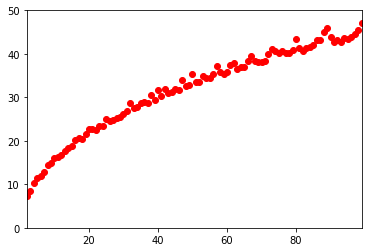

In [63]:
# optimal block length for nbb 
import numpy as np
from math import sqrt
block_lim=100
var3=0.0
n_bootstrap=1000
lmin=2 
mse_min= float("inf")
mse_arr=list()
for l1 in range(2,block_lim,1):
 var3=0.0   
 for idx in range(n_bootstrap):
  
 
  n=800
  N=n//l1
  if(n!=N*l1):
    N=N+1
  array=np.zeros((N,1),dtype=np.int)

  for i in range(N):
    array[i,0]=i
  arr=array.reshape(len(array))
  n_elements=0
  A=list()   
  while(n_elements<n):
        j=np.random.choice(arr,replace=True)
        
        if(j!=N-1):
            n_elements=n_elements+l1
            for i in range(l1):
                A.append(x_train[j*l1+i,0])
        else:
            n_elements=n_elements+n-(N-1)*l1
            for i in range((N-1)*l1,n):
                A.append(x_train[i,0])
  A=np.array(A).reshape(len(A),1)
  var3=var3+block_mse(l1,x_train,A)
 mse=sqrt(var3/n_bootstrap)
 mse_arr.append(mse)
 if(mse<=mse_min):
    lmin=l1
    mse_min=mse
print(lmin,mse_min)
mse_arr=np.array(mse_arr).reshape(len(mse_arr))
#z=np.linspace(2,4,1)
import matplotlib.pyplot as plt
for z in range(2,block_lim,1):
 plt.plot(z,mse_arr[z-2],'ro')
plt.axis([2,block_lim-1,0,50])
plt.show()

In [56]:
print(mse_arr[20])

22.486484151680813


yt head :
0    393.0777
1    391.6012
2    390.7403
3    391.8214
4    394.3039
Name: close, dtype: float64


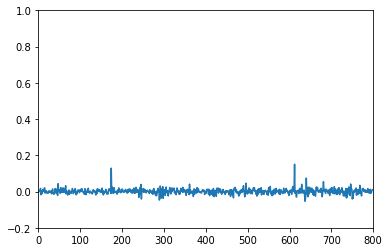

In [64]:
import numpy as np
import pandas as pd
data_csv=pd.read_csv("C:\\Users\\shankhajyoti\\Dropbox\\Deepak\\GOOGL_data.csv")
data_to_use= len(data_csv)
 
# number of training data
# should be less than data_to_use
train_end =len(data_csv)-458
 
 
total_data=len(data_csv)
 
#most recent data is in the end 
#so need offset
start=total_data - data_to_use
 
 
#currently doing prediction only for 1 step ahead
steps_to_predict =1
 
  
yt = data_csv.iloc [start:total_data ,4]    #Close price
yt1 = data_csv.iloc [start:total_data ,1]   #Open
yt2 = data_csv.iloc [start:total_data ,2]   #High
yt3 = data_csv.iloc [start:total_data ,3]   #Low
vt = data_csv.iloc [start:total_data ,5]    # volume
 
 
print ("yt head :")
print (yt.head())
 
yt_ = yt.shift (-1)
    
data = pd.concat ([yt, yt_, vt, yt1, yt2, yt3], axis =1)
data. columns = ['yt', 'yt_', 'vt', 'yt1', 'yt2', 'yt3']
     
data = data.dropna()
cols =['yt']
x = data [cols]
x_train=x.loc[0:799,:] 
# we apply the bootstrap only on the training data
x_train=np.array(x_train).reshape(len(x_train),1)

p=len(x_train)
log_xtrain=np.zeros((p-1,1),dtype=float)
for j in range(p-1):
    log_xtrain[j,0]=np.log(x_train[j+1,0]/x_train[j,0])
import matplotlib.pyplot as plt
ax=plt.axes()
ax.set_xlim([0,800])
ax.set_ylim([-0.2,None])
plt.plot(log_xtrain)
plt.show()
# the logged return values seem stationary

2 10.97658802585318


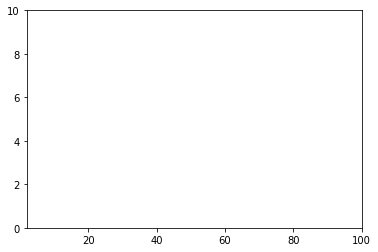

In [69]:
import numpy as np
from math import sqrt
block_lim=101

var3=0.0
n_bootstrap=1000
lmin=2 
mse_min= float("inf")
mse_arr=list()
for l1 in range(2,block_lim,1):
 var3=0.0   
 for idx in range(n_bootstrap):
  
  x_bootstrap=list()
  n=799
  N=n//l1
  if(n!=N*l1):
    N=N+1
  array=np.zeros((N,1),dtype=np.int)

  for i in range(N):
    array[i,0]=i
  arr=array.reshape(len(array))
  n_elements=0
  A=list()   
  while(n_elements<n):
        j=np.random.choice(arr,replace=True)
        
        if(j!=N-1):
            n_elements=n_elements+l1
            for i in range(l1):
                A.append(log_xtrain[j*l1+i,0])
        else:
            n_elements=n_elements+n-(N-1)*l1
            for i in range((N-1)*l1,n):
                A.append(log_xtrain[i,0])
  A=np.array(A).reshape(len(A),1)
  prod=x_train[0,0]
  x_bootstrap.append(prod)
  for j in range(len(x_train)-1):
     prod=prod*np.exp(A[j,0])
     x_bootstrap.append(prod)
  x_bootstrap=np.array(x_bootstrap).reshape(len(x_bootstrap),1)
  var3=var3+block_mse(l1,x_train,x_bootstrap)
 mse=sqrt(var3/n_bootstrap)
 mse_arr.append(mse*1000)
 if(mse<=mse_min):
    lmin=l1
    mse_min=mse
print(lmin,mse_min)
mse_arr=np.array(mse_arr).reshape(len(mse_arr))
#z=np.linspace(2,4,1)
import matplotlib.pyplot as plt
for z in range(2,block_lim,1):
 plt.plot(z,mse_arr[z-2],'ro')
plt.axis([2,block_lim-1,0,10])
plt.show()

# this shows that even after we bootstrap in logged returns values and then check block aggregated mse over the xtrain samples 
# it again leads us to having an optimum block length of 2 just like all the previous cases, as the data xtrain isn't exactly 
# following any particular distribution or is stationary block aggregated mse measurement always leads us to having optimum 
# block length of 2.

95 0.00041969622257435207


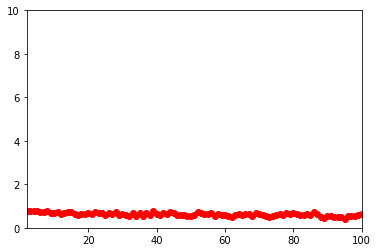

0.7596494605917689
0.7655801646689583
0.7725547318849361
0.7638539559362686
0.6737847912058965
0.6291626426834568
0.6857114701592647
0.6004523082577078
0.5588232855193599
0.6358952073399139
0.5490069929494401
0.6664482101256967
0.6193004710620746


In [71]:
# so we resort back to our previous method of checking block mse in the range of 100  for logged returns and then finding the 
# minm block mse for the values of block length =2,4,5,8,10,16,20,25,32,40,50,80,100 as these block lengths divide the size of 
# x_train
block_lim=101

var3=0.0
n_bootstrap=1000
lmin=2 
mse_min= float("inf")
mse_arr=list()
for l1 in range(2,block_lim,1):
 var3=0.0   
 for idx in range(n_bootstrap):
  
  
  n=799
  N=n//l1
  if(n!=N*l1):
    N=N+1
  array=np.zeros((N,1),dtype=np.int)

  for i in range(N):
    array[i,0]=i
  arr=array.reshape(len(array))
  n_elements=0
  A=list()   
  while(n_elements<n):
        j=np.random.choice(arr,replace=True)
        
        if(j!=N-1):
            n_elements=n_elements+l1
            for i in range(l1):
                A.append(log_xtrain[j*l1+i,0])
        else:
            n_elements=n_elements+n-(N-1)*l1
            for i in range((N-1)*l1,n):
                A.append(log_xtrain[i,0])
  A=np.array(A).reshape(len(A),1)
  
  var3=var3+block_mse(l1,log_xtrain,A)
 mse=sqrt(var3/n_bootstrap)
 mse_arr.append(mse*1000)
 if(mse<=mse_min):
    lmin=l1
    mse_min=mse
print(lmin,mse_min)
mse_arr=np.array(mse_arr).reshape(len(mse_arr))
#z=np.linspace(2,4,1)
import matplotlib.pyplot as plt
for z in range(2,block_lim,1):
 plt.plot(z,mse_arr[z-2],'ro')
plt.axis([2,block_lim-1,0,10])
plt.show()
for z in [2,4,5,8,10,16,20,25,32,40,50,80,100]:
    print(mse_arr[z-2])

In [73]:
print(mse_arr[93])
print(mse_arr[48])
# from the above results we can see that minm block aggregated mse is at 95 but among our possible block lengths 50 gives minm 
# block aggregated mse.

0.4196962225743521
0.5490069929494401


95 0.0004954109878750113


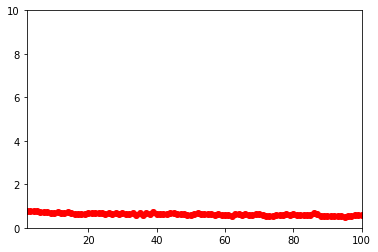

0.7608203748908602
0.7668399432954717
0.7602627257490864
0.7445519257894182
0.6925632405381692
0.6525466134292408
0.6807301113398143
0.6412903733077228
0.6119174115443831
0.6473535728903841
0.5993183985926324
0.6361980211350555
0.5941382307791339


In [74]:
# finding best parameteres for mbb
import numpy as np
from math import sqrt
block_lim=101
var3=0.0
n_bootstrap=1000
 
mse_min= float("inf")
mse_arr=list()
for l1 in range(2,block_lim,1):
 var3=0.0   
 for idx in range(n_bootstrap):
  
 
  n=799
  
  

  
  n_elements=0
  A=list()   
   #optimal block length 
  b1=(n//l1) #no of blocks to be used
  if (n!=b1*l1):
    b1=b1+1
    
  N=n-l1+1   
  ind=np.zeros((N,1),dtype=np.int)
  for i in range(0,N):
    ind[i,0]=i
  ind=np.array(ind).reshape(len(ind),1)  
  for p in range(b1):
        array=ind.reshape(len(ind))
        h=np.random.choice(array,replace=True)
        for q in range(h,h+l1):
            A.append(log_xtrain[q,0])
  A=np.array(A).reshape(len(A),1)
  var3=var3+block_mse(l1,log_xtrain,A)
 mse=sqrt(var3/n_bootstrap)
 mse_arr.append(mse*1000)
 if(mse<=mse_min):
    lmin=l1
    mse_min=mse
print(lmin,mse_min)
mse_arr=np.array(mse_arr).reshape(len(mse_arr))
#z=np.linspace(2,4,1)
import matplotlib.pyplot as plt
for z in range(2,block_lim,1):
 plt.plot(z,mse_arr[z-2],'ro')
plt.axis([2,block_lim-1,0,10])
plt.show()
for z in [2,4,5,8,10,16,20,25,32,40,50,80,100]:
    print(mse_arr[z-2])

50 0.0004631305783912636


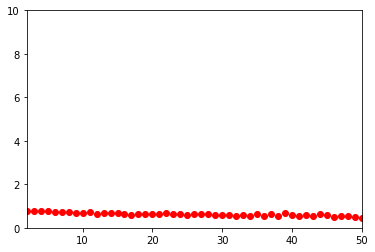

In [76]:
# finding best parameteres for lbb on logged returns
from math import sqrt
import numpy as np

 #block length
f=60
min_rmse=float("inf")
block_lim=51
mse_arr=list()
for b in range(2,block_lim,1):
 m=0
 j=1
 n=799
 u=n//b
 if(n!=b*u):
    u=u+1
    
 var3=0.0
 n_bootstrap=1000
 sum=0.0
 for idx in range(n_bootstrap):
  A=list()
 
  m=0
  while(m<u):
      rl=max(1,m*b-f)
        
      rh=min(n-b+1,m*b+f)
      
      k=np.random.randint(rl,rh)   
      while(j<b+1):
         A.append(log_xtrain[k+j-2,0])
                 
        #lbb_listy=lbb_listy.append(y.iloc[k+j-1-1,:],ignore_index=True)
         j=j+1
      j=1
      m=m+1
        
  A=np.array(A).reshape(len(A),1)
 #sum =sum+np.mean(A,axis=0)  
  var3=var3+block_mse(b,log_xtrain,A)
 mse=sqrt(var3/n_bootstrap)
 mse_arr.append(mse*1000)
 if(min_rmse>var3):
        min_rmse=var3
        min_blocklength=b
print(min_blocklength,sqrt(min_rmse/n_bootstrap))

#print((sum/n_bootstrap)-mu)
# optimum block length is 50
mse_arr=np.array(mse_arr).reshape(len(mse_arr))
#z=np.linspace(2,4,1)
import matplotlib.pyplot as plt
for z in range(2,block_lim,1):
 plt.plot(z,mse_arr[z-2],'ro')
plt.axis([2,block_lim-1,0,10])
plt.show()


yt head :
0    393.0777
1    391.6012
2    390.7403
3    391.8214
4    394.3039
Name: close, dtype: float64


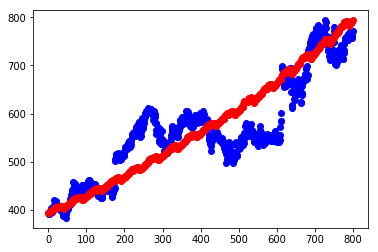

In [3]:
#applying nbb with block length 
import numpy as np

import pandas as pd
data_csv=pd.read_csv("C:\\Users\\shankhajyoti\\Dropbox\\Deepak\\GOOGL_data.csv")
data_to_use= len(data_csv)
 
# number of training data
# should be less than data_to_use
train_end =len(data_csv)-458
 
 
total_data=len(data_csv)
 
#most recent data is in the end 
#so need offset
start=total_data - data_to_use
 
 
#currently doing prediction only for 1 step ahead
steps_to_predict =1
 
  
yt = data_csv.iloc [start:total_data ,4]    #Close price
yt1 = data_csv.iloc [start:total_data ,1]   #Open
yt2 = data_csv.iloc [start:total_data ,2]   #High
yt3 = data_csv.iloc [start:total_data ,3]   #Low
vt = data_csv.iloc [start:total_data ,5]    # volume
 
 
print ("yt head :")
print (yt.head())
 
yt_ = yt.shift (-1)
    
data = pd.concat ([yt, yt_, vt, yt1, yt2, yt3], axis =1)
data. columns = ['yt', 'yt_', 'vt', 'yt1', 'yt2', 'yt3']
     
data = data.dropna()
cols =['yt']
x = data [cols]
x_train=x.loc[0:799,:] 
# we apply the bootstrap only on the training data
x_train=np.array(x_train).reshape(len(x_train),1)


import matplotlib.pyplot as plt

xtrain=np.zeros((len(x_train)),dtype=float)
for j in range(len(x_train)):
    xtrain[j]=x_train[j,0]
n_bootstrap=1000
x_bootstrap=list()
arr_bootstrap=np.zeros((n_bootstrap,len(x_train)),dtype=float)
for idx in range(n_bootstrap):
#plt.plot(xtrain)
 l1=50 #optimal block length 
 
 n=799
 N=n//l1
 if(n!=N*l1):
    N=N+1
 array=np.zeros((N,1),dtype=np.int)

 for i in range(N):
    array[i,0]=i
 arr=array.reshape(len(array))
 n_elements=0
 bootstrapper=list()

 while(n_elements<n):
        j=np.random.choice(arr,replace=True)
        
        if(j!=N-1):
            n_elements=n_elements+l1
            for i in range(l1):
                bootstrapper.append(log_xtrain[j*l1+i,0])
        else:
            n_elements=n_elements+n-(N-1)*l1
            for i in range((N-1)*l1,n):
                bootstrapper.append(log_xtrain[i,0])
 #x_train=np.array(x_train).reshape(len(x_train),1)                

 prod=x_train[0,0]
 x_bootstrap.append(prod)
 for j in range(len(x_train)-1):
    prod=prod*np.exp(bootstrapper[j])
    x_bootstrap.append(prod)
    
 for i in range(len(x_train)):
    arr_bootstrap[idx,i]=x_bootstrap[i]
 x_bootstrap.clear()   
x_train_avg=np.zeros((len(x_train),1),dtype=float)
x_train_avg=np.mean(arr_bootstrap,axis=0).reshape(len(x_train),1)


for j in range(len(xtrain)):
    plt.plot(j,xtrain[j],'bo')


for j in range(len(x_train_avg)):
    plt.plot(j,x_train_avg[j,0],'ro')
plt.show()

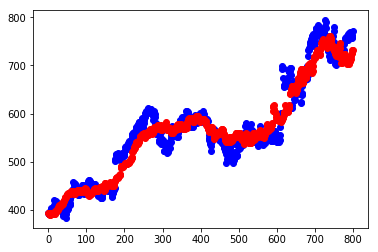

In [80]:
# applying lbb with the same data
import matplotlib.pyplot as plt
import random
xtrain=np.zeros((len(x_train)),dtype=float)
for j in range(len(x_train)):
    xtrain[j]=x_train[j,0]
n_bootstrap=5
x_bootstrap=list()
arr_bootstrap=np.zeros((n_bootstrap,len(x_train)),dtype=float)
for idx in range(n_bootstrap):
#plt.plot(xtrain)
 l1=50
 b=l1   #optimal block length 
 f=50
 n=799
 N=n//l1
 if(n!=N*l1):
    N=N+1
 array=np.zeros((N,1),dtype=np.int)

 for i in range(N):
    array[i,0]=i
 arr=array.reshape(len(array))
 n_elements=0
 bootstrapper=list()

 m=0
 j=1
 u=n//b
 if(n!=b*u):
    u=u+1
     
 while(m<u):
      rl=max(1,m*b-f)
        
      rh=min(n-b+1,m*b+f)
    
      k=random.randint(rl,rh)   
      while(j<b+1):
         
         
         bootstrapper.append(log_xtrain[k+j-1-1,0])
        
        #lbb_listy=lbb_listy.append(y.iloc[k+j-1-1,:],ignore_index=True)
         j=j+1
      j=1
      m=m+1
 #x_train=np.array(x_train).reshape(len(x_train),1)                

 prod=x_train[0,0]
 x_bootstrap.append(prod)
 for j in range(len(x_train)-1):
    prod=prod*np.exp(bootstrapper[j])
    x_bootstrap.append(prod)
    
 for i in range(len(x_train)):
    arr_bootstrap[idx,i]=x_bootstrap[i]
 x_bootstrap.clear()   
x_train_avg=np.zeros((len(x_train),1),dtype=float)
x_train_avg=np.mean(arr_bootstrap,axis=0).reshape(len(x_train),1)


for j in range(len(xtrain)):
    plt.plot(j,xtrain[j],'bo')


for j in range(len(x_train_avg)):
    plt.plot(j,x_train_avg[j,0],'ro')
plt.show()

yt head :
0    393.0777
1    391.6012
2    390.7403
3    391.8214
4    394.3039
Name: close, dtype: float64


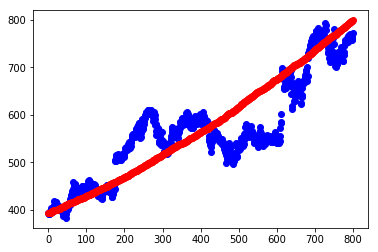

In [7]:
import numpy as np

import pandas as pd
data_csv=pd.read_csv("C:\\Users\\shankhajyoti\\Dropbox\\Deepak\\GOOGL_data.csv")
data_to_use= len(data_csv)
 
# number of training data
# should be less than data_to_use
train_end =len(data_csv)-458
 
 
total_data=len(data_csv)
 
#most recent data is in the end 
#so need offset
start=total_data - data_to_use
 
 
#currently doing prediction only for 1 step ahead
steps_to_predict =1
 
  
yt = data_csv.iloc [start:total_data ,4]    #Close price
yt1 = data_csv.iloc [start:total_data ,1]   #Open
yt2 = data_csv.iloc [start:total_data ,2]   #High
yt3 = data_csv.iloc [start:total_data ,3]   #Low
vt = data_csv.iloc [start:total_data ,5]    # volume
 
 
print ("yt head :")
print (yt.head())
 
yt_ = yt.shift (-1)
    
data = pd.concat ([yt, yt_, vt, yt1, yt2, yt3], axis =1)
data. columns = ['yt', 'yt_', 'vt', 'yt1', 'yt2', 'yt3']
     
data = data.dropna()
cols =['yt']
x = data [cols]
x_train=x.loc[0:799,:] 
# we apply the bootstrap only on the training data
x_train=np.array(x_train).reshape(len(x_train),1)


import matplotlib.pyplot as plt

xtrain=np.zeros((len(x_train)),dtype=float)
for j in range(len(x_train)):
    xtrain[j]=x_train[j,0]
n_bootstrap=1000
x_bootstrap=list()
arr_bootstrap=np.zeros((n_bootstrap,len(x_train)),dtype=float)
for idx in range(n_bootstrap):
#plt.plot(xtrain)
  #optimal block length 
 
 n=799
 
 n_elements=0
 bootstrapper=list()

 l1=70 #optimal block length 
 b1=(n//l1) #no of blocks to be used
 if (n!=b1*l1):
    b1=b1+1
 N=n-l1+1   
 ind=np.zeros((N,1),dtype=np.int)
 for i in range(0,N):
    ind[i,0]=i
 ind=np.array(ind).reshape(len(ind),1)  
 for p in range(b1):
        array=ind.reshape(len(ind))
        h=np.random.choice(array,replace=True)
        for q in range(h,h+l1):
           bootstrapper.append(log_xtrain[q,0])
 
 prod=x_train[0,0]
 x_bootstrap.append(prod)
 for j in range(len(x_train)-1):
    prod=prod*np.exp(bootstrapper[j])
    x_bootstrap.append(prod)
    
 for i in range(len(x_train)):
    arr_bootstrap[idx,i]=x_bootstrap[i]
 x_bootstrap.clear()   
x_train_avg=np.zeros((len(x_train),1),dtype=float)
x_train_avg=np.mean(arr_bootstrap,axis=0).reshape(len(x_train),1)


for j in range(len(xtrain)):
    plt.plot(j,xtrain[j],'bo')


for j in range(len(x_train_avg)):
    plt.plot(j,x_train_avg[j,0],'ro')
plt.show()